# Author: Vidit Jain

## Data Science and Business Analytics Intern
### GRIP @ The Sparks Foundation
## Task 5: Exploratory Data Analysis - Sports
* Performed ‘Exploratory Data Analysis’ on dataset Indian Premier League.
* Conclude most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.

## Importing Libraries

In [848]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings(action= 'ignore')

## Importing Dataset

In [849]:
delivery_df = pd.read_csv('deliveries.csv')
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [850]:
matches_df = pd.read_csv('matches.csv')
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Last Season Data

In [994]:
matches_2019 = match_df[match_df['season']==2019]
matches_2019.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
696,11137,2019,Chennai,23/03/19,RCB,CSk,CSk,field,normal,0,CSk,0,7,Harbhajan Singh,M. A. Chidambaram Stadium,Bruce Oxenford,Anil Dandekar,Nitin Menon
697,11138,2019,Kolkata,24/03/19,SRH,KKR,KKR,field,normal,0,KKR,0,6,AD Russell,Eden Gardens,Chris Gaffaney,Anil Chaudhary,Vineet Kulkarni
698,11139,2019,Mumbai,24/03/19,DC,MI,MI,field,normal,0,DC,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan


In [995]:
delivery_2019 = delivery_df[delivery_df['match_id']>11136]
delivery_2019.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
164750,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,1,V Kohli,PA Patel,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
164751,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,2,PA Patel,V Kohli,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164752,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,3,PA Patel,V Kohli,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [851]:
delivery_df.shape, match_df.shape

((179078, 21), (756, 18))

In [852]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [853]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Exploratory Data Analysis

In [854]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [855]:
matches_df.replace( {'Sunrisers Hyderabad' : 'SRH', 'Mumbai Indians' : 'MI', 'Gujarat Lions' : 'GL', 
                     'Rising Pune Supergiant' : 'RPS', 'Royal Challengers Bangalore' : 'RCB', 
                     'Kolkata Knight Riders' : 'KKR', 'Delhi Daredevils' : 'DC', 'Kings XI Punjab' : 'KXIP', 
                     'Chennai Super Kings' : 'CSK', 'Rajasthan Royals' : 'RR', 'Deccan Chargers' : 'SRH', 
                     'Kochi Tuskers Kerala' : 'KTK', 'Pune Warriors' : 'PWI', 
                     'Rising Pune Supergiants' : 'RPS', 'Delhi Capitals' : 'DC'} , inplace=True)

### Matches won by each team

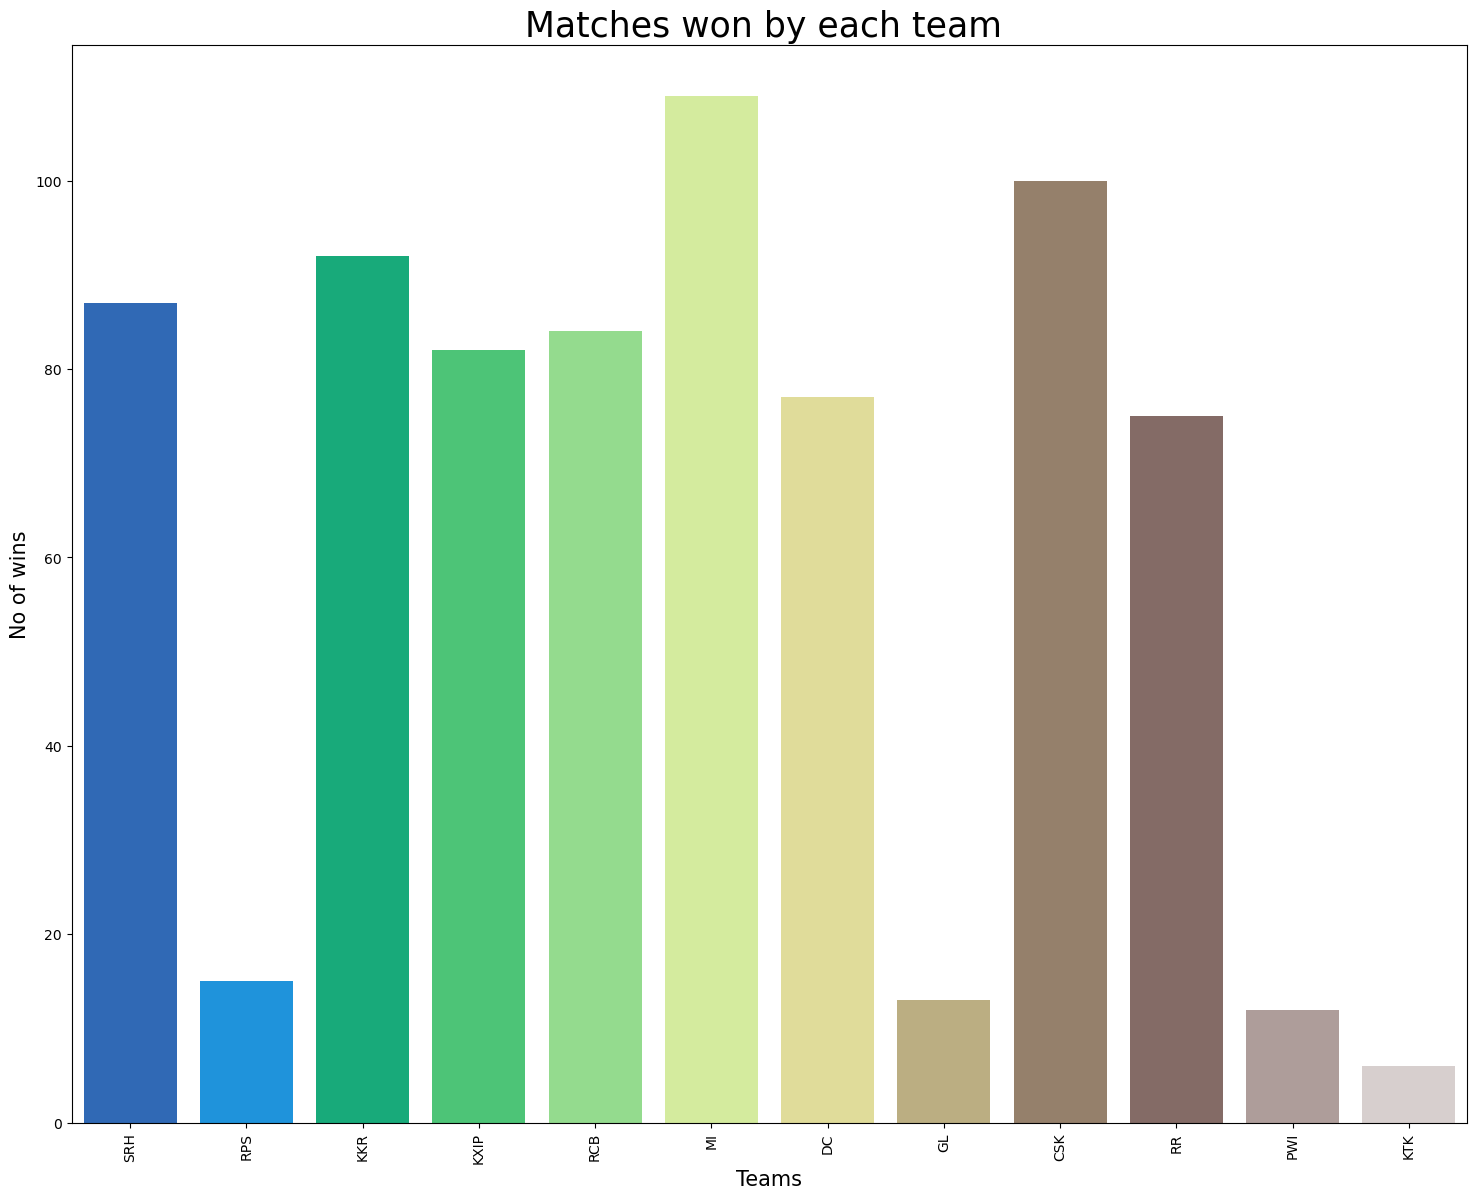

In [856]:
plt.figure(figsize = (18,14))
sns.countplot(x='winner',data=matches_df,palette='terrain')
plt.title("Matches won by each team ",fontsize=25)
plt.xticks(rotation=90)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

## Winning Teams

Text(0.5, 0, 'Frequency')

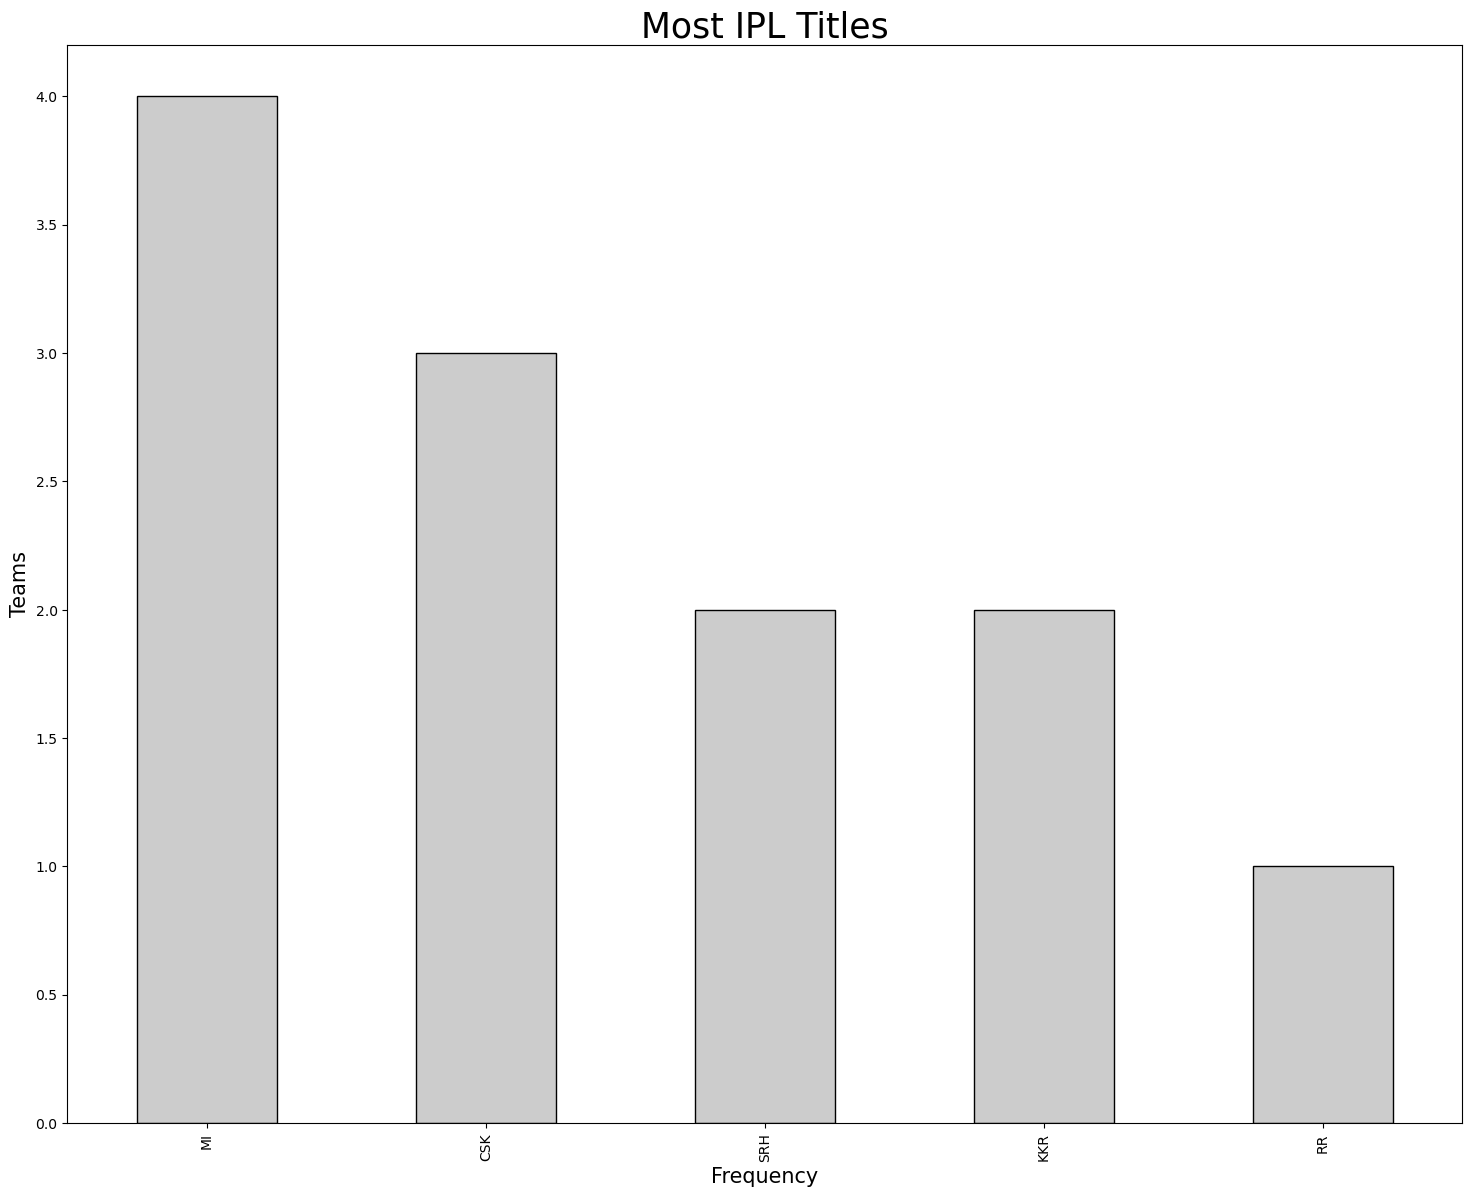

In [892]:
winning_team = {}
for i in sorted(matches_df.season.unique()):
    winning_team[i] = matches_df[matches_df.season == i]['winner'].tail(1).values[0]
    
ipl_winners = pd.Series(winning_team)
ipl_winners = pd.DataFrame(ipl_winners, columns=['team'])


plt.figure(figsize = (18,14))
ipl_winners['team'].value_counts().plot.bar(color = '0.8', edgecolor='black')
plt.title("Most IPL Titles",fontsize=25)
plt.ylabel("Teams", size = 15)
plt.xlabel("Frequency", size = 15)

**Mumbai Indians** is most Succesful team with **maximum no. of IPL Titles**

### Top players

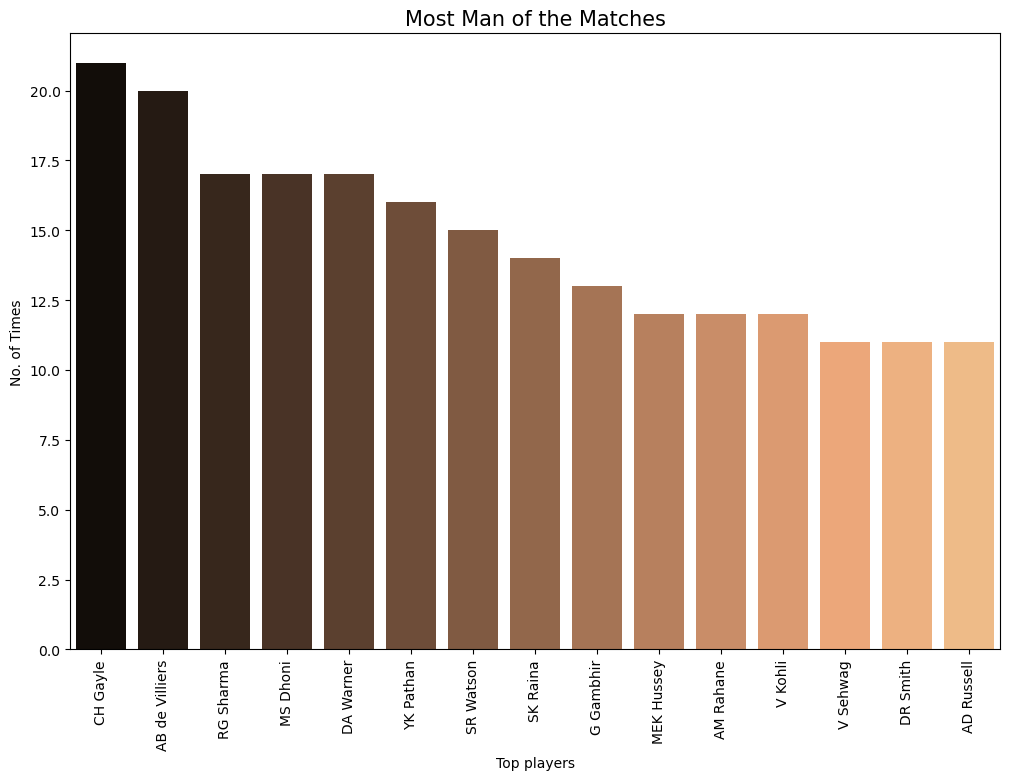

In [857]:
plt.figure(figsize = (12,8))

MOM = matches_df['player_of_match'].value_counts()[:15]
sns.barplot(x = MOM.index, y = MOM, palette='copper')
plt.xticks(rotation=90)
plt.title("Most Man of the Matches",fontsize=15)
plt.xlabel("Top players")
plt.ylabel("No. of Times")
plt.show()

**Chris Gayle , Ab de Villiers , Rohit Sharma , MS Dhoni , David Warner** are top-5 players of IPL that contributes most in winning matches

## Exploring Toss

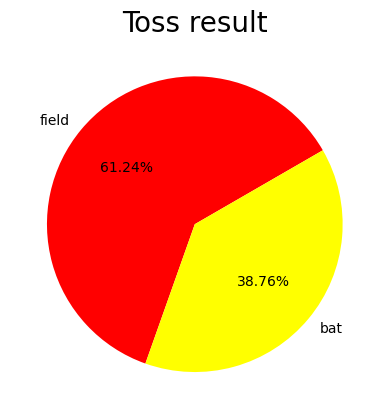

In [858]:
toss = matches_df['toss_decision'].value_counts()

plt.pie(toss.values, labels=toss.index, autopct='%1.2f%%',startangle=30,colors=['red','yellow'])
plt.title('Toss result',fontsize=20)
plt.show()

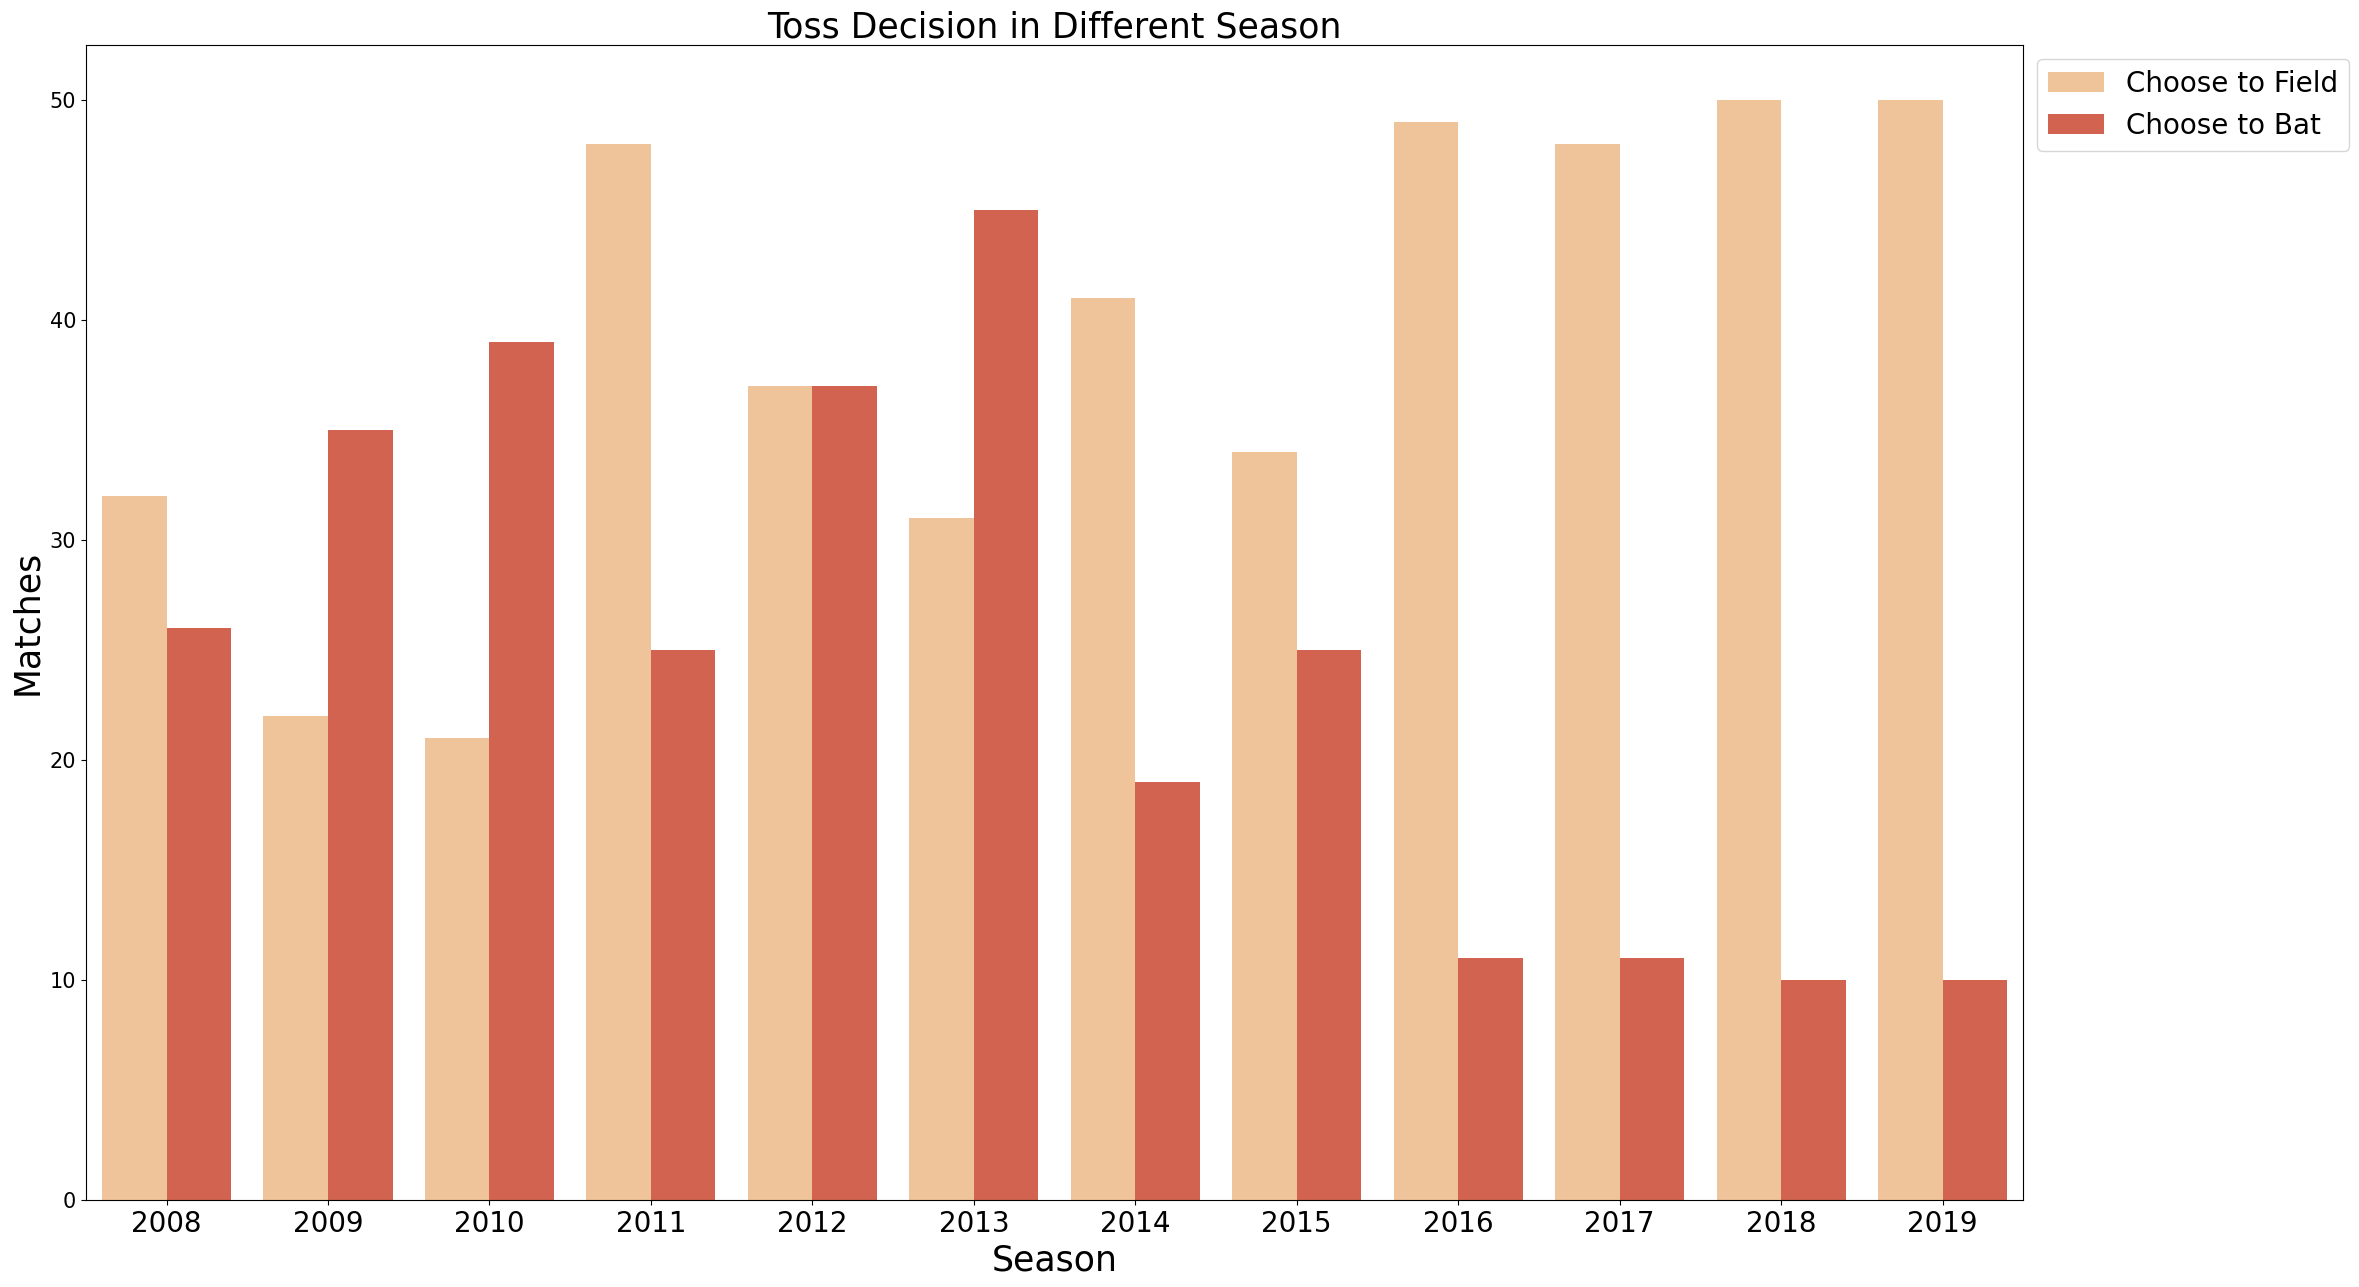

In [977]:
plt.figure(figsize = (25,15))
sns.countplot('season',hue='toss_decision',data=matches_df,palette='OrRd')
plt.title("Toss Decision in Different Season",fontsize=25)
plt.xlabel("Season",fontsize=25)
plt.ylabel("Matches",fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.legend( ["Choose to Field", "Choose to Bat"], bbox_to_anchor =(1,1), fontsize=20)
plt.show()

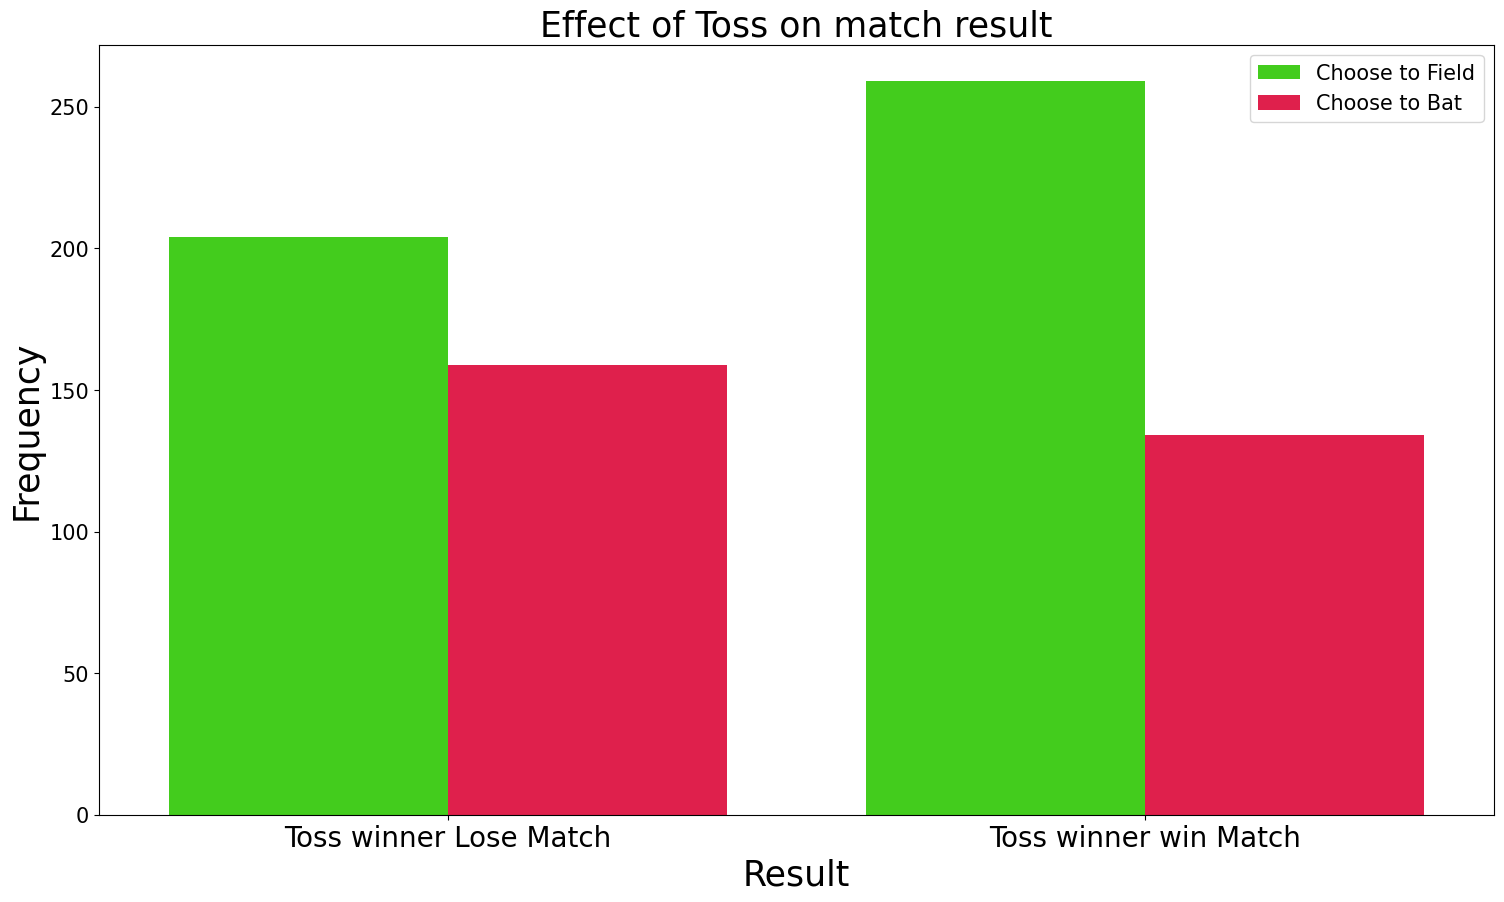

In [967]:
matches_df['win_with_toss'] = np.where((matches_df.toss_winner == matches_df.winner),'Toss winner win Match',
                                                                                     'Toss winner Lose Match')

plt.figure(figsize = (18,10))
sns.countplot('win_with_toss', data=matches_df, hue = 'toss_decision', palette='prism')
plt.title("Effect of Toss on match result", fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.xlabel("Result", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)
plt.legend( ["Choose to Field", "Choose to Bat"], bbox_to_anchor =(1,1), fontsize=15)
plt.show()

In [861]:
df = matches_df.groupby('win_with_toss')['toss_decision']
df.value_counts()

win_with_toss           toss_decision
Toss winner Lose Match  field            204
                        bat              159
Toss winner win Match   field            259
                        bat              134
Name: toss_decision, dtype: int64

In [926]:
chase_wins = matches_df[( matches_df['win_by_wickets']>0) & (matches_df['result']=='normal') ].shape[0]
total_matches = match_df[ (matches_df['result']=='normal') ].shape[0]

print('Wins while chasing(Overall): {}%'.format( np.round(chase_wins/total_matches*100,2)) )

Wins while chasing(Overall): 54.64%


### For Last Season

In [996]:
chase_wins_2019 = matches_2019[( matches_2019['win_by_wickets']>0) & (matches_2019['result']=='normal') ].shape[0]
total_matches_2019 = matches_2019[ (matches_2019['result']=='normal') ].shape[0]
print('Wins while chasing(last season): {}%'.format( np.round(chase_wins_2019/total_matches_2019*100,2)) )

Wins while chasing(last season): 61.4%


If the Team decided to field after winning toss , the **chances of winning match in more**

## Inspecting Batsman

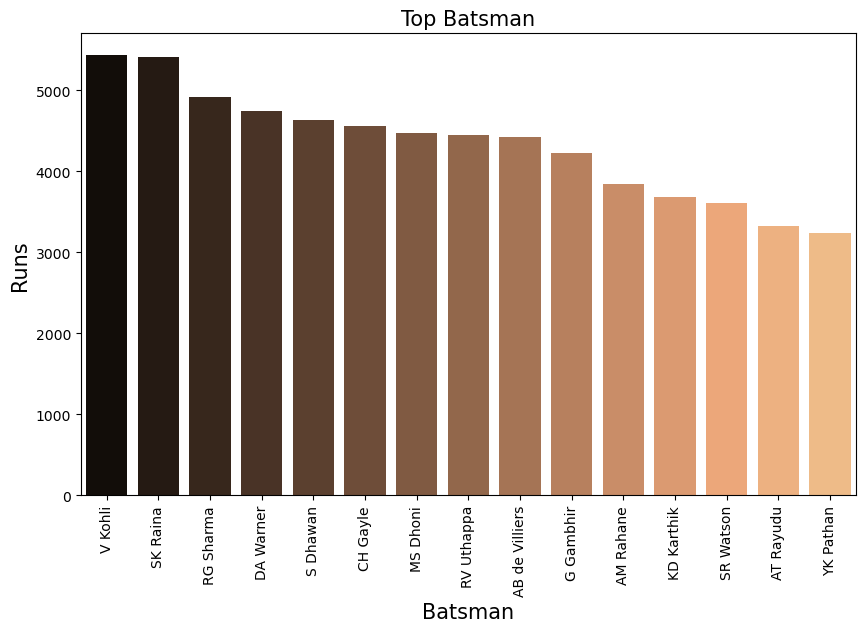

In [862]:
plt.figure(figsize = (10,6))

top_batsman = delivery_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(15)

sns.barplot(x = top_batsman.index, y = top_batsman, palette='copper')
plt.xticks(rotation=90)
plt.title("Top Batsman",fontsize=15)
plt.xlabel("Batsman",fontsize=15)
plt.ylabel("Runs",fontsize=15)
plt.show()

### Most Boundaries by Batsman

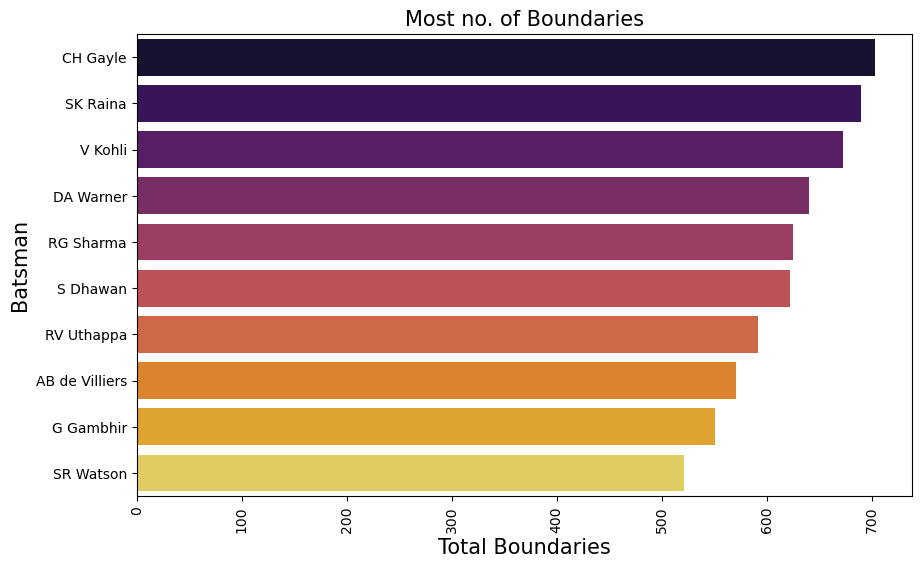

In [993]:
plt.figure(figsize = (10,6))

boundaries = delivery_df[(delivery_df['batsman_runs']==4) | (delivery_df['batsman_runs']==6)]['batsman'].value_counts()[:10]

sns.barplot(x = boundaries, y = boundaries.index, palette='inferno')
plt.xticks(rotation=90)
plt.title("Most no. of Boundaries",fontsize=15)
plt.ylabel("Batsman",fontsize=15)
plt.xlabel("Total Boundaries",fontsize=15)
plt.show()

### Most Sixes by Batsman

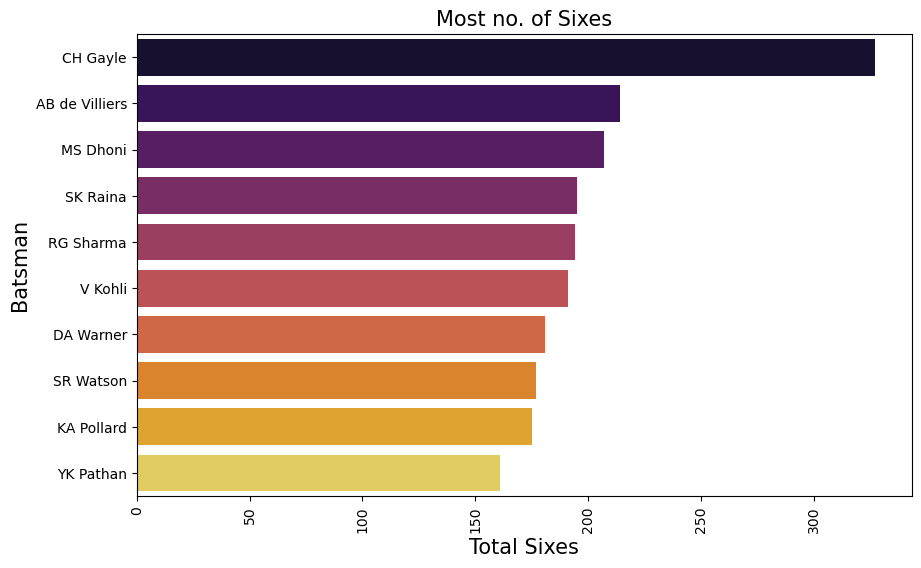

In [863]:
plt.figure(figsize = (10,6))

sixes = delivery_df[delivery_df['batsman_runs']==6]['batsman'].value_counts()[:10]

sns.barplot(x = sixes, y = sixes.index, palette='inferno')
plt.xticks(rotation=90)
plt.title("Most no. of Sixes",fontsize=15)
plt.ylabel("Batsman",fontsize=15)
plt.xlabel("Total Sixes",fontsize=15)
plt.show()

### Most Fours by Batsman

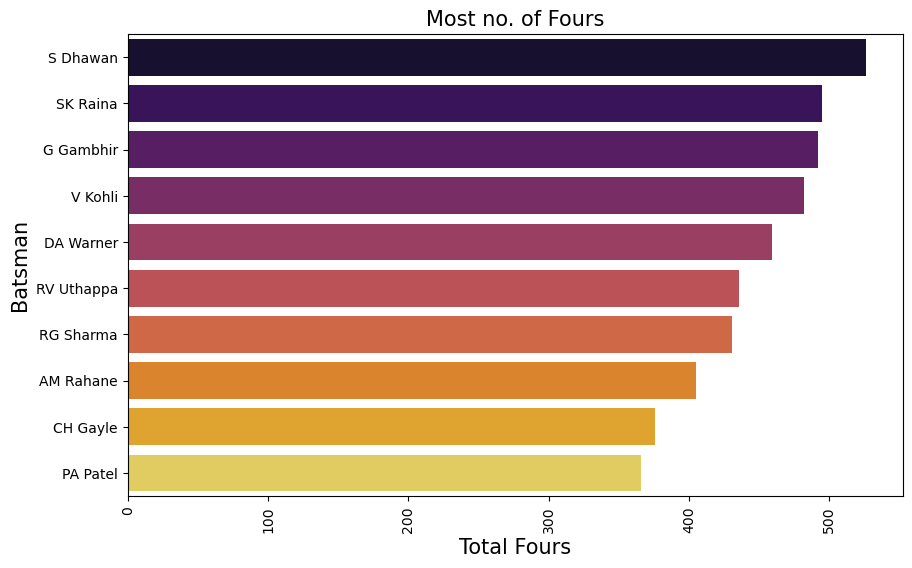

In [864]:
plt.figure(figsize = (10,6))

fours = delivery_df[delivery_df['batsman_runs']==4]['batsman'].value_counts()[:10]

sns.barplot(x = fours, y = fours.index, palette='inferno')
plt.xticks(rotation=90)
plt.title("Most no. of Fours",fontsize=15)
plt.ylabel("Batsman",fontsize=15)
plt.xlabel("Total Fours",fontsize=15)
plt.show()

## Inspecting Bowlers

In [865]:
bowler_wickets = delivery_df[ (delivery_df['dismissal_kind'] == 'caught') |  
                            (delivery_df['dismissal_kind'] == 'bowled') | 
                             (delivery_df['dismissal_kind'] == 'lbw') | 
                             (delivery_df['dismissal_kind'] == 'stumped')| 
                             (delivery_df['dismissal_kind'] == 'caught and bowled') ] 
bowler_wickets.shape

(7958, 21)

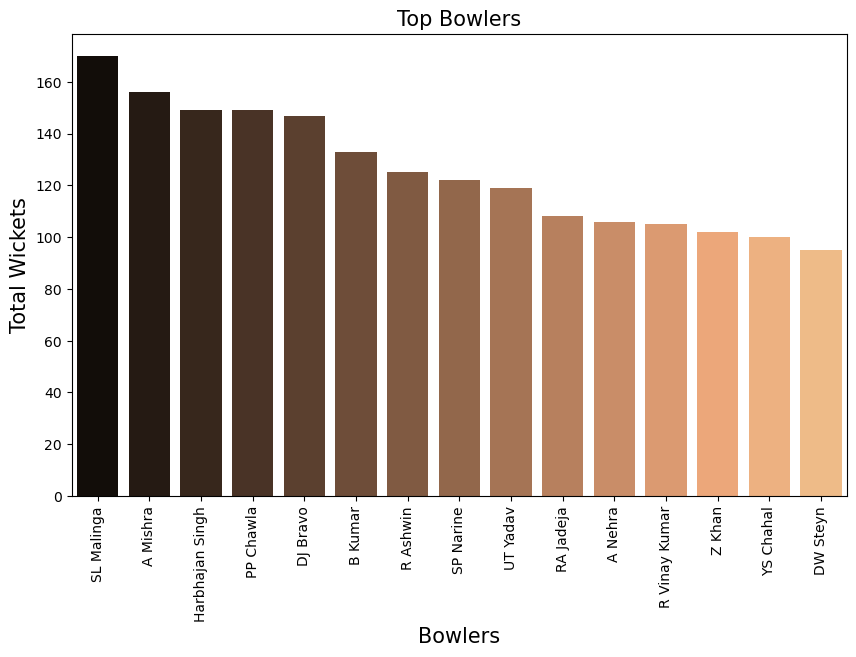

In [866]:
plt.figure(figsize = (10,6))

top_bowlers = bowler_wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)[:15]

sns.barplot(x = top_bowlers.index, y = top_bowlers, palette='copper')
plt.xticks(rotation=90)
plt.title("Top Bowlers",fontsize=15)
plt.xlabel("Bowlers",fontsize=15)
plt.ylabel("Total Wickets",fontsize=15)
plt.show()

### Most No-Balls by Bowlers

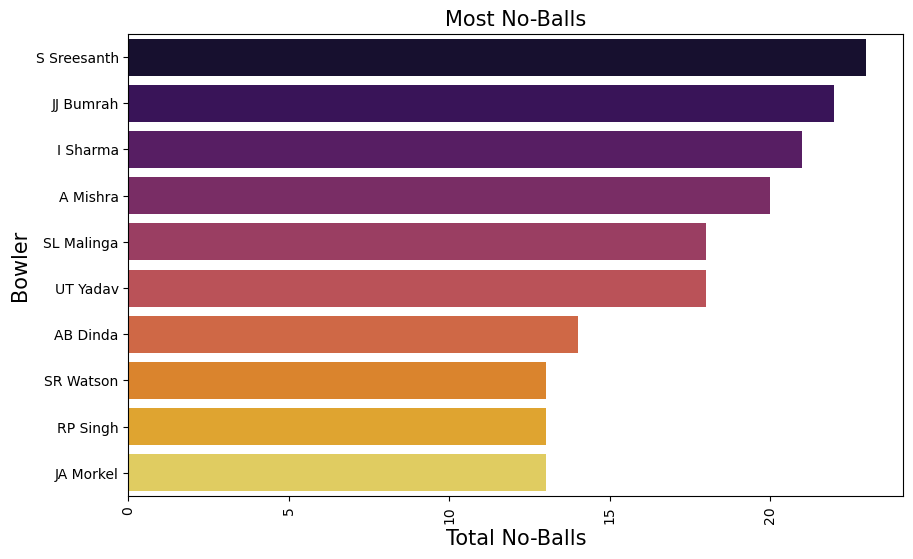

In [867]:
plt.figure(figsize = (10,6))

no_balls = delivery_df[delivery_df['noball_runs']!=0]['bowler'].value_counts()[:10]

sns.barplot(x = no_balls, y = no_balls.index, palette='inferno')
plt.xticks(rotation=90)
plt.title("Most No-Balls",fontsize=15)
plt.ylabel("Bowler",fontsize=15)
plt.xlabel("Total No-Balls",fontsize=15)
plt.show()

### Most Wide-Balls by Bowlers

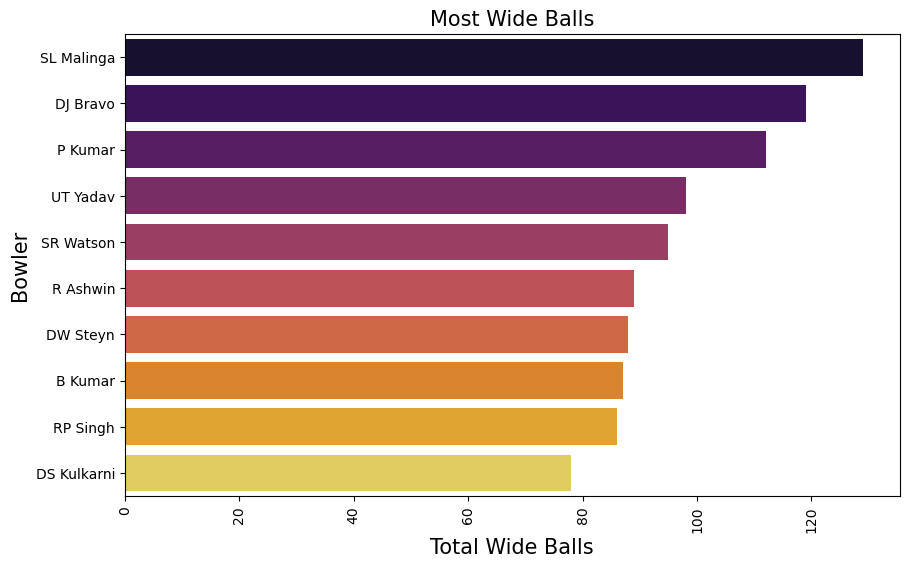

In [868]:
plt.figure(figsize = (10,6))

wide_balls = delivery_df[delivery_df['wide_runs']!=0]['bowler'].value_counts()[:10]

sns.barplot(x = wide_balls, y = wide_balls.index, palette='inferno')
plt.xticks(rotation=90)
plt.title("Most Wide Balls",fontsize=15)
plt.ylabel("Bowler",fontsize=15)
plt.xlabel("Total Wide Balls",fontsize=15)
plt.show()

### Bowlers with maximum Sixes

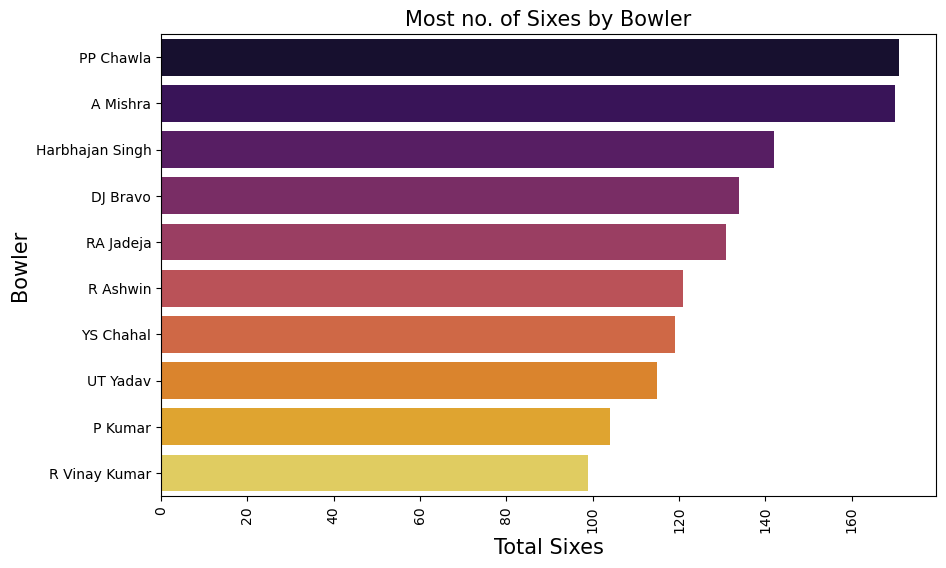

In [869]:
plt.figure(figsize = (10,6))

bowler_sixes = delivery_df[delivery_df['batsman_runs']==6]['bowler'].value_counts()[:10]

sns.barplot(x = bowler_sixes, y = bowler_sixes.index, palette='inferno')
plt.xticks(rotation=90)
plt.title("Most no. of Sixes by Bowler",fontsize=15)
plt.ylabel("Bowler",fontsize=15)
plt.xlabel("Total Sixes",fontsize=15)
plt.show()

### Maximum Dot Balls

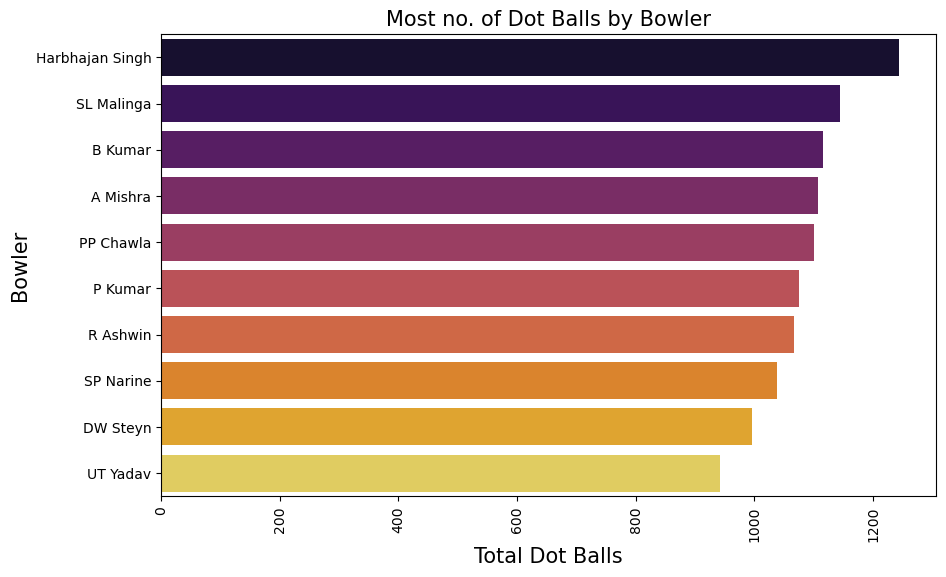

In [870]:
plt.figure(figsize = (10,6))

max_dot = delivery_df[delivery_df['total_runs']==0]['bowler'].value_counts()[:10]

sns.barplot(x = max_dot, y = max_dot.index, palette='inferno')
plt.xticks(rotation=90)
plt.title("Most no. of Dot Balls by Bowler",fontsize=15)
plt.ylabel("Bowler",fontsize=15)
plt.xlabel("Total Dot Balls",fontsize=15)
plt.show()

## Inspecting Fielders

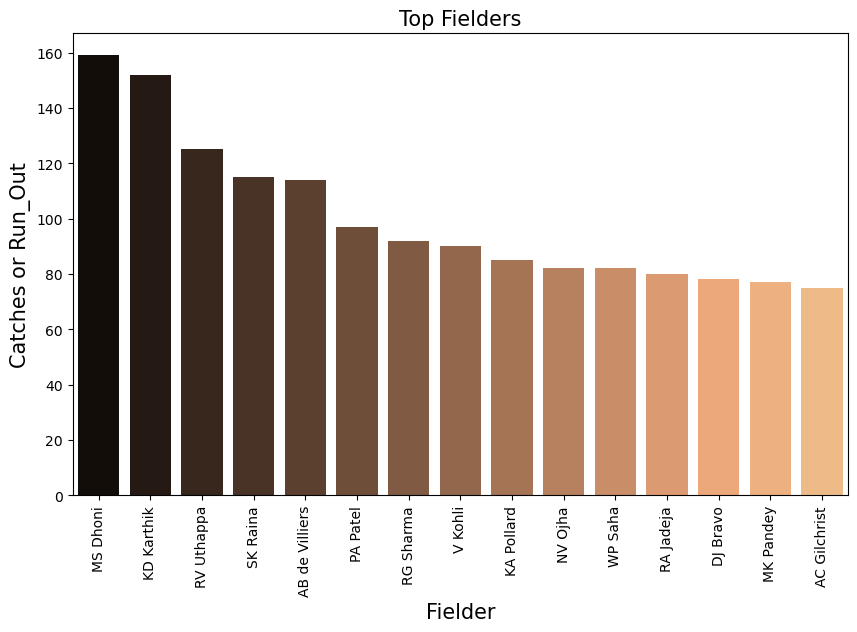

In [871]:
plt.figure(figsize = (10,6))

top_fielders = delivery_df['fielder'].value_counts()[:15]

sns.barplot(x = top_fielders.index, y = top_fielders, palette='copper')
plt.xticks(rotation=90)
plt.title("Top Fielders",fontsize=15)
plt.xlabel("Fielder",fontsize=15)
plt.ylabel("Catches or Run_Out",fontsize=15)
plt.show()

In terms of Wicket_keeper ; **M.S. Dhoni performed best**

In terms of Fielder ; **Suresh Raina perfrmed best**

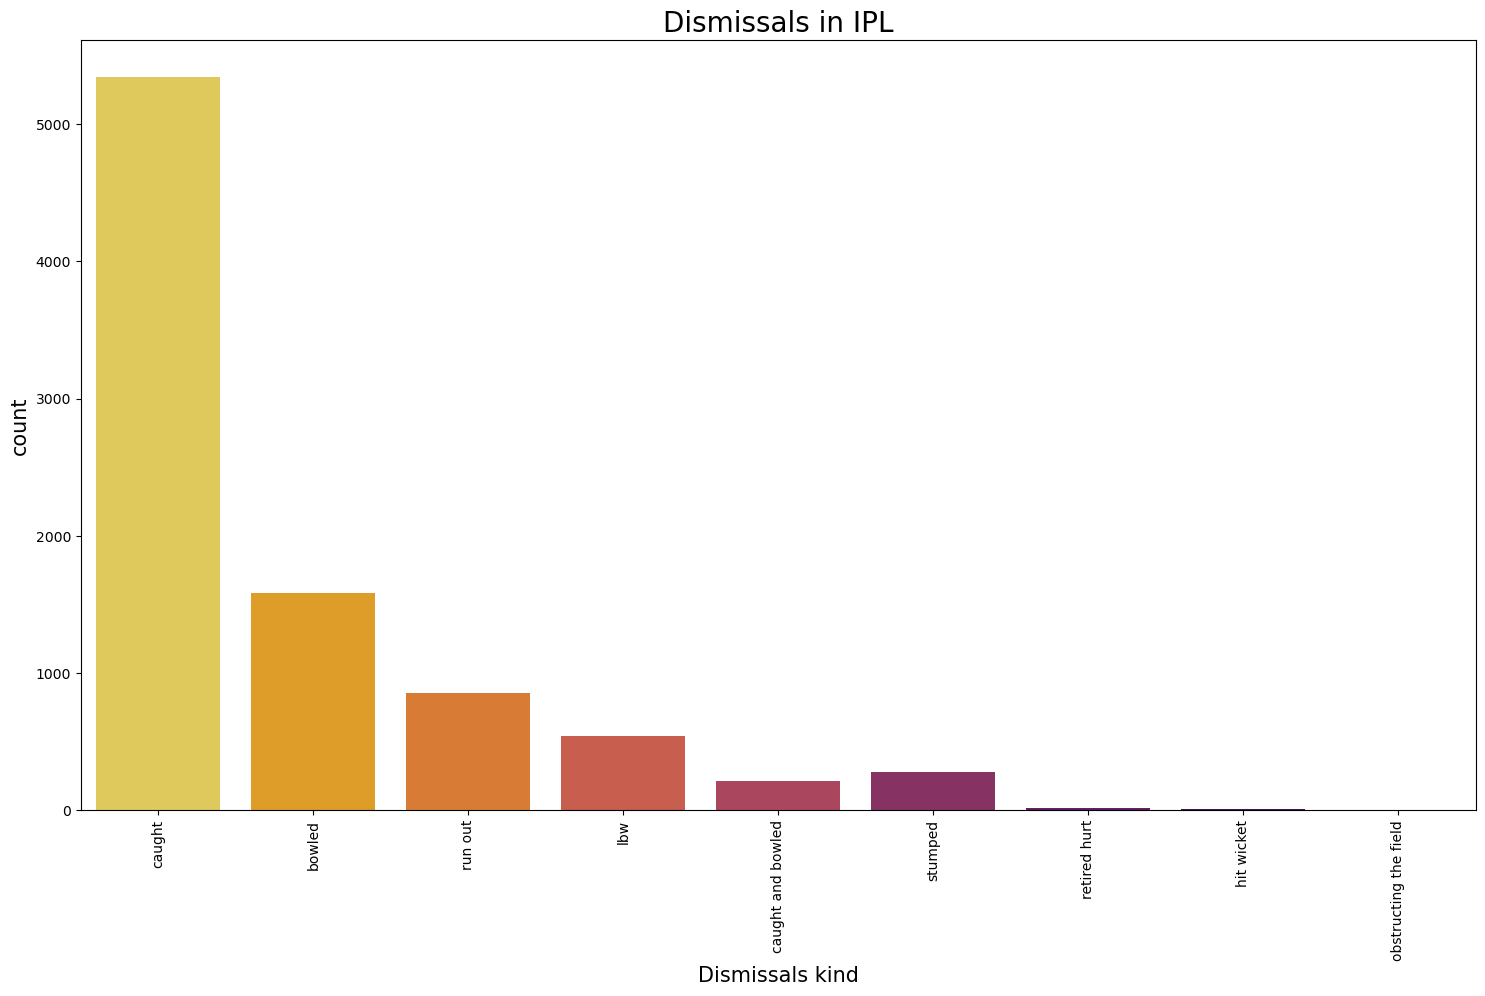

In [872]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(delivery_df.dismissal_kind, palette='inferno_r')
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Calculating no. of wickets as a result of good fielding

In [873]:
wickets_due_to_fielding_df = delivery_df[(delivery_df['dismissal_kind']=='caught') | 
                                     ( delivery_df['dismissal_kind']=='run out') ]

wickets_due_to_fielding = wickets_due_to_fielding_df.dismissal_kind.value_counts().sum()
wickets_due_to_fielding

6200

In [874]:
total_wickets = delivery_df.dismissal_kind.value_counts().sum()
total_wickets

8834

In [875]:
wickets_due_to_fielding = wickets_due_to_fielding/ total_wickets*100
print('wickets as a result of good fielding: {} %'.format(wickets_due_to_fielding))

wickets as a result of good fielding: 70.18338238623501 %


**More than 70% wickets are because of good fielding** ; Therefore Fielding Potential of the team can have a great impact on match result

## Inspecting Last Year Data

In [762]:
matches_2019 = match_df[match_df['season']==2019]
matches_2019.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
696,11137,2019,Chennai,23/03/19,RCB,CSk,CSk,field,normal,0,CSk,0,7,Harbhajan Singh,M. A. Chidambaram Stadium,Bruce Oxenford,Anil Dandekar,Nitin Menon
697,11138,2019,Kolkata,24/03/19,SRH,KKR,KKR,field,normal,0,KKR,0,6,AD Russell,Eden Gardens,Chris Gaffaney,Anil Chaudhary,Vineet Kulkarni
698,11139,2019,Mumbai,24/03/19,DC,MI,MI,field,normal,0,DC,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
699,11140,2019,Jaipur,25/03/19,KXIP,RR,RR,field,normal,0,KXIP,14,0,CH Gayle,Sawai Mansingh Stadium,C Shamshuddin,KN Anantapadmanabhan,Bruce Oxenford
700,11141,2019,Delhi,26/03/19,DC,CSk,DC,bat,normal,0,CSk,0,6,SR Watson,Feroz Shah Kotla Ground,Marais Erasmus,Nitin Menon,Anil Dandekar


In [763]:
matches_2019 = match_df[match_df['season']==2019]
matches_2019.head()

delivery_2019 = delivery_df[delivery_df['match_id']>11136]
delivery_2019.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
164750,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,1,V Kohli,PA Patel,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
164751,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,2,PA Patel,V Kohli,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164752,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,3,PA Patel,V Kohli,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164753,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,4,PA Patel,V Kohli,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164754,11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,5,PA Patel,V Kohli,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


### Race for Orange Cap

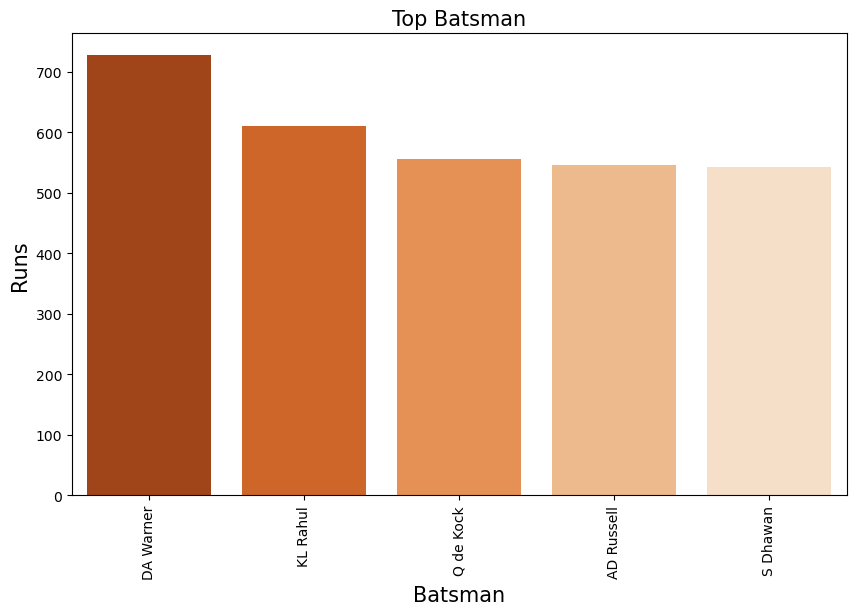

In [764]:
plt.figure(figsize = (10,6))

top_batsman = delivery_2019.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[:5]

sns.barplot(x = top_batsman.index, y = top_batsman, palette='Oranges_r')
plt.xticks(rotation=90)
plt.title("Top Batsman",fontsize=15)
plt.xlabel("Batsman",fontsize=15)
plt.ylabel("Runs",fontsize=15)
plt.show()

**David warner** won the **Orange Cap** in 2019

### Race for Purple Cap

In [765]:
bowler_wickets_2019 = delivery_2019[ (delivery_2019['dismissal_kind'] == 'caught') |  
                            (delivery_2019['dismissal_kind'] == 'bowled') | 
                             (delivery_2019['dismissal_kind'] == 'lbw') | 
                             (delivery_2019['dismissal_kind'] == 'stumped')| 
                             (delivery_2019['dismissal_kind'] == 'caught and bowled') ] 
bowler_wickets_2019.shape

(635, 21)

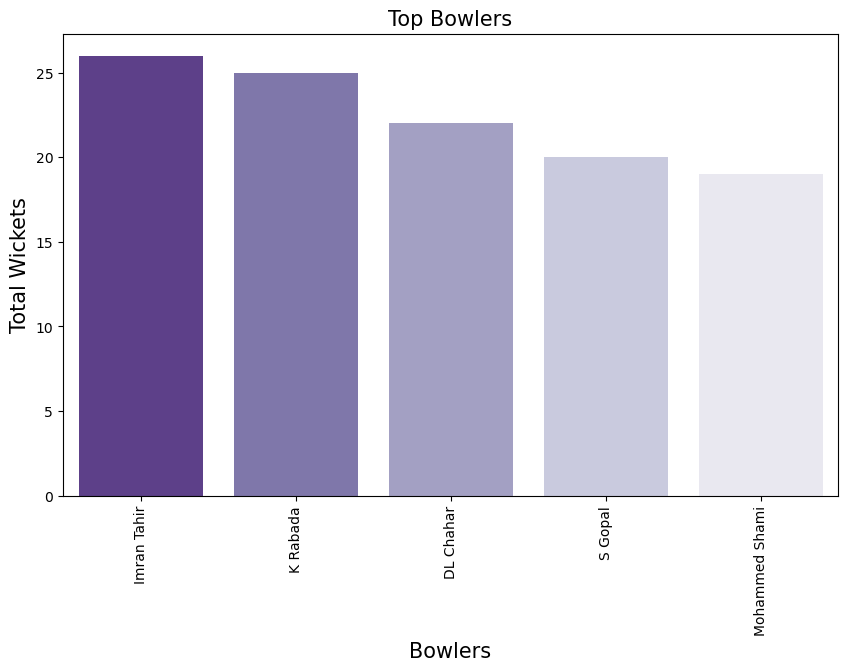

In [766]:
plt.figure(figsize = (10,6))

top_bowlers = bowler_wickets_2019.groupby('bowler')['dismissal_kind'].count().sort_values(ascending = False)[:5]

sns.barplot(x = top_bowlers.index, y = top_bowlers, palette='Purples_r')
plt.xticks(rotation=90)
plt.title("Top Bowlers",fontsize=15)
plt.xlabel("Bowlers",fontsize=15)
plt.ylabel("Total Wickets",fontsize=15)
plt.show()

**Imran Tahir** won the **Puple Cap** in 2019

### Maximum Sixes

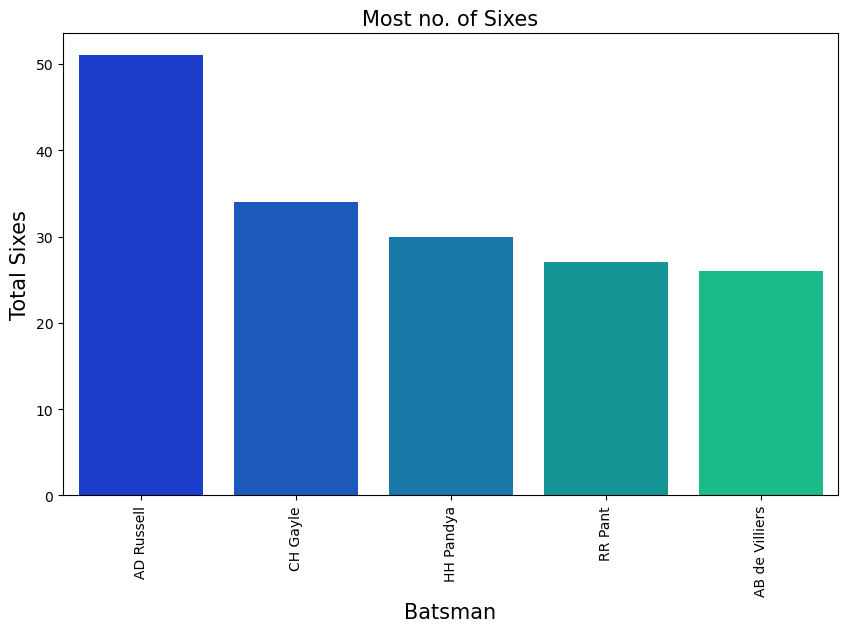

In [768]:
plt.figure(figsize = (10,6))

sixes = delivery_2019[delivery_df['batsman_runs']==6]['batsman'].value_counts()[:5]

sns.barplot(x = sixes.index, y = sixes, palette='winter')
plt.xticks(rotation=90)
plt.title("Most no. of Sixes",fontsize=15)
plt.xlabel("Batsman",fontsize=15)
plt.ylabel("Total Sixes",fontsize=15)
plt.show()

**Andre Russell** hits **maximum no. of sixes** in 2019 season.

# CONCLUSIONS

### 1. Most Succesful Teams
    Most IPL Titles: Mumbai Indians
    Most Matches Won: Mumbai Indians

### 2. Most Succesful Batsman
    Most Man of the Matches: Chris Gayle
    Most Runs: Virat Kohli
    Most No. of Boundaries: Chris Gayle
    Most no. of Sixes: Chris Gayle
    Most no. of Fours: Shikhar Dhawan

### 3. Most Succesful Bowler
    Most Wickets: Lasith Malinga
    Maximum Dot Balls: Harbhajan Singh

### 4. Most Succesful Fielder
    Best Wicket-Keeper: M.S. Dhoni
    Best Fielder: Suresh Raina

### 5. Last Season (2019)
    Orange Cap: David Warner 
    Purple Cap: Imran Tahir
    Most no. of Sixes: Andre Russell

### 6. Teams/Players company should endrose
    Teams: Mumbai Indians
           Chennai Super Kings

    Players: Chris Gayle
             Virat Kohli
             Rohit Sharma
             M.S. Dhoni
             Lasith Malinga
             Suresh Raina
             Ab de Villiers
             Harbhajan Singh
             David Warner
             Shikhar Dhawan
             
             

### Factors that can effect Match Results
1. Since more than 70% of wickets are *Caught and Run Out* , therefore **presence of better fielders** can effect match result.
2. Winh by chasing is 54.6%(overall) and 61.40%(last yr) , therefore **choose to field first** can also effect match result.